In [2]:
# import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg


In [3]:
# read data
training_features = pd.read_csv("training_set_features.csv",
                    sep=',').dropna()


test_features = pd.read_csv("test_set_features.csv",
                    sep=',').dropna()



training_labels = pd.read_csv("training_set_labels.csv",
                    sep=',').dropna()

submission = pd.read_csv("submission_format.csv",
                    sep=',').dropna()

In [7]:
training_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [8]:
training_features=test_features.fillna(training_features.mean())


training_features=test_features.fillna('out-of-category')

In [9]:
#no missing values are left 
training_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [22]:
test_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [11]:
test_features=test_features.fillna(training_features.mean())


test_features=test_features.fillna('out-of-category')

In [12]:
#no missing values are left 
test_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [13]:
train_dataset = training_features.merge(training_labels, on='respondent_id')
test_dataset = test_features.merge(submission, on='respondent_id')

In [33]:
train_test = pd.concat([train_dataset,test_dataset])
train_test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,0.5,0.7
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,0.5,0.7
2,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,0.5,0.7
3,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",0.0,2.0,fcxhlnwr,cmhcxjea,0.5,0.7
4,26718,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,fpwskwrf,"MSA, Principle City",0.0,0.0,arjwrbjb,hfxkjkmi,0.5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,53405,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,arjwrbjb,hfxkjkmi,0.5,0.7
6495,53407,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",3.0,1.0,dotnnunm,hfxkjkmi,0.5,0.7
6496,53408,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Own,Employed,oxchjgsf,Non-MSA,0.0,3.0,fcxhlnwr,haliazsg,0.5,0.7
6497,53409,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,xicduogh,xtkaffoo,0.5,0.7


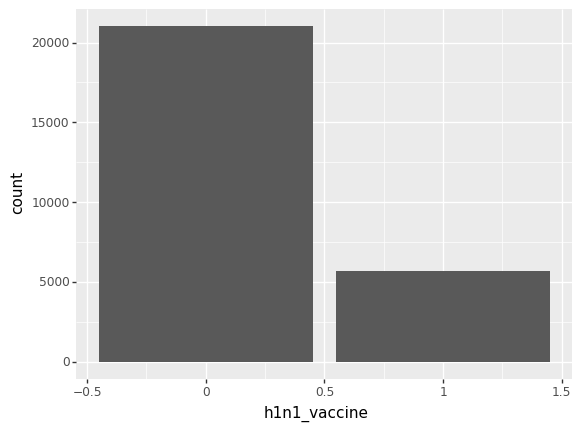

<ggplot: (-9223371890804928184)>

In [10]:
%matplotlib inline

ggplot(training_labels, aes(x='h1n1_vaccine')) + \
    geom_bar(stat = 'count')


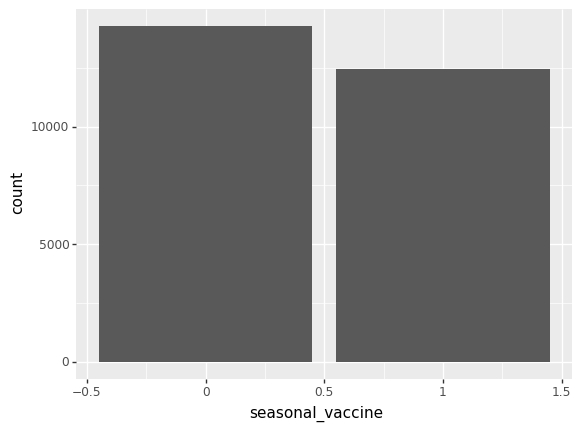

<ggplot: (-9223371890805098912)>

In [9]:
%matplotlib inline

ggplot(training_labels, aes(x='seasonal_vaccine')) + \
    geom_bar(stat = 'count')

In [6]:
non_number_columns = training_features.dtypes[training_features.dtypes == object].index.values
non_number_columns

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object)

       age_group  count
0  18 - 34 Years   1533
1  35 - 44 Years   1383
2  45 - 54 Years   1721
3  55 - 64 Years   1434
4      65+ Years    428


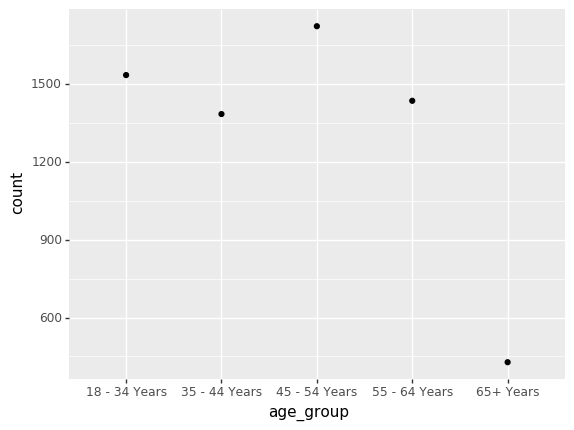

<ggplot: (-9223371890804228408)>

In [52]:
%matplotlib inline

age_group_counts = training_features[['age_group', 'respondent_id']].groupby(['age_group']).count().reset_index()
age_group_counts.columns = ['age_group', 'count']
print(age_group_counts)

ggplot(aes(x = 'age_group', y = 'count'),data = age_group_counts) + \
  geom_point()

   education by age  count
0          12 Years   1173
1        < 12 Years    345
2  College Graduate   3228
3      Some College   1753


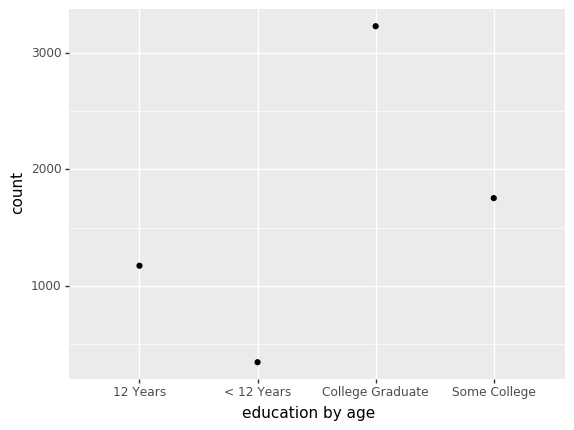

<ggplot: (-9223371890804188708)>

In [51]:
education_counts = training_features[['education', 'respondent_id']].groupby(['education']).count().reset_index()
education_counts.columns = ['education by age', 'count']
print(education_counts)

ggplot(aes(x = 'education by age', y = 'count'),data = education_counts) + \
  geom_point()


  differentiate by racisim  count
0                    Black    449
1                 Hispanic    450
2        Other or Multiple    315
3                    White   5285


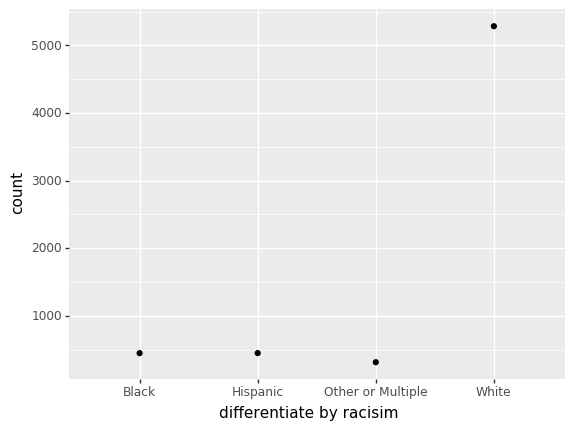

<ggplot: (-9223371890804149184)>

In [54]:
race_counts = training_features[['race', 'respondent_id']].groupby(['race']).count().reset_index()
race_counts.columns = ['differentiate by racisim', 'count']
print(race_counts)

ggplot(aes(x = 'differentiate by racisim', y = 'count'),data = race_counts) + \
  geom_point()

    differentiate by poverty  count
0  <= $75,000, Above Poverty   3449
1                  > $75,000   2636
2              Below Poverty    414


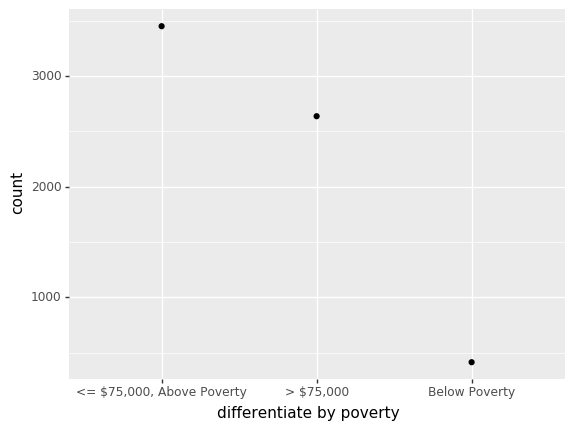

<ggplot: (-9223371890804269384)>

In [57]:
income_poverty = training_features[['income_poverty', 'respondent_id']].groupby(['income_poverty']).count().reset_index()
income_poverty.columns = ['differentiate by poverty', 'count']
print(income_poverty)

ggplot(aes(x = 'differentiate by poverty', y = 'count'),data = income_poverty) + \
  geom_point()

In [61]:
non_number_columns = training_features.dtypes[training_features.dtypes == object].index.values
non_number_columns

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object)

In [62]:
error = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'employment_industry', 'employment_occupation']
success = set(non_number_columns) - set(error)

In [63]:
for column in error:
    training_features[column] = training_features[column].astype(str)
training_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
X,,,,,,,,,,,,,,,,,,,,,
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Own,Employed,mlyzmhmf,"MSA, Principle City",0.0,2.0,fcxhlnwr,cmhcxjea
11,26718,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"> $75,000",Not Married,Own,Employed,fpwskwrf,"MSA, Principle City",0.0,0.0,arjwrbjb,hfxkjkmi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,53405,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,arjwrbjb,hfxkjkmi
26700,53407,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",3.0,1.0,dotnnunm,hfxkjkmi
26701,53408,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Not Married,Own,Employed,oxchjgsf,Non-MSA,0.0,3.0,fcxhlnwr,haliazsg


In [50]:
len(training_features), len(test_features)

(6437, 6499)

In [99]:
train_dataset = training_features.merge(training_labels, on='respondent_id')
train_dataset

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
1,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
2,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
3,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
4,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,arjwrbjb,bxpfxfdn,0,0
6433,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,1
6434,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,1.0,mcubkhph,oijqvulv,0,0
6435,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0


h1n1_vaccine
Mean 0.30060587230076125
Median 0.0


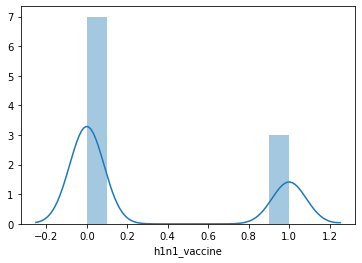

seasonal_vaccine
Mean 0.4576666148827093
Median 0.0


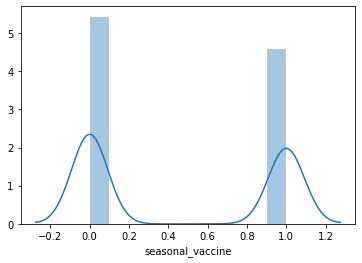

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

for columns in training_labels.columns[1:]:
    print(columns)
    print('Mean',train_dataset[columns].mean())
    print('Median',train_dataset[columns].median())
    sns.distplot(train_dataset[columns]) # , kde=False, fit=stats.gamma
    plt.show()